# DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
main_data = pd.read_csv('Attrition_data.csv')

In [3]:
main_data.head()

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager
1,2,XYZ2490,ABC2,05-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,06-Apr-12,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,07-Apr-12,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager
3,4,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth
4,5,XYZ2378,ABC5,03-Mar-10,Sales Executive,E1,Yes,Jagdishpuram,10-Apr-12,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager


In [4]:
location_clean = pd.read_csv('location_clean.csv')
location_clean.head()

,id,doubtful,corrected_location,changed,district,state
0,1,NO,bhavnagar,NO,bhavnagar,gujarat
1,2,YES,jayanagar,NO,NaN,karnataka
2,3,NO,indore,NO,indore,madhya pradesh
3,4,NO,admin gujarat,NO,NaN,gujarat
4,5,YES,jagdishpuram,NO,NaN,uttar pradesh


In [5]:
data = pd.merge(main_data, location_clean, how= 'inner',left_on = 'S.No', right_on='id' )
data.drop('id',axis =1, inplace = True)
data.head()

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,...,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks,doubtful,corrected_location,changed,district,state
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,...,25535,2%,Divorced,West,Issues with the Manager,NO,bhavnagar,NO,bhavnagar,gujarat
1,2,XYZ2490,ABC2,05-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,06-Apr-12,1. 9,...,52155,45%,Single,South,More Challenging Job Roles/ Higher designation,YES,jayanagar,NO,NaN,karnataka
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,07-Apr-12,1. 5,...,26438,18%,Divorced,CENTRAL,Issues with the Manager,NO,indore,NO,indore,madhya pradesh
3,4,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3 .11,...,54311,82%,Single,West,Lack of Growth,NO,admin gujarat,NO,NaN,gujarat
4,5,XYZ2378,ABC5,03-Mar-10,Sales Executive,E1,Yes,Jagdishpuram,10-Apr-12,2 .1,...,26702,49%,Divorced,North,Issues with the Manager,YES,jagdishpuram,NO,NaN,uttar pradesh


In [6]:
assert location_clean.shape[0] == data.shape[0]

In [7]:
data.shape

(327, 24)

### Converting the columns into right datatypes and extracting data

In [8]:
data = data.rename(columns = {'Engagement Score (% Satisfaction)':'sat_score'})
data['sat_score'] = data['sat_score'].apply(lambda x:x[:-1])
data.head()

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,...,Monthly Income,sat_score,Marital Status,Zone,Remarks,doubtful,corrected_location,changed,district,state
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,...,25535,2,Divorced,West,Issues with the Manager,NO,bhavnagar,NO,bhavnagar,gujarat
1,2,XYZ2490,ABC2,05-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,06-Apr-12,1. 9,...,52155,45,Single,South,More Challenging Job Roles/ Higher designation,YES,jayanagar,NO,NaN,karnataka
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,07-Apr-12,1. 5,...,26438,18,Divorced,CENTRAL,Issues with the Manager,NO,indore,NO,indore,madhya pradesh
3,4,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3 .11,...,54311,82,Single,West,Lack of Growth,NO,admin gujarat,NO,NaN,gujarat
4,5,XYZ2378,ABC5,03-Mar-10,Sales Executive,E1,Yes,Jagdishpuram,10-Apr-12,2 .1,...,26702,49,Divorced,North,Issues with the Manager,YES,jagdishpuram,NO,NaN,uttar pradesh


In [9]:
data['sat_score'] = data['sat_score'].astype('int')

In [10]:
#np.where(data['Location'].isna())
#data.loc[[48,111],:]
# data.drop([48,111],axis = 0, inplace= True) #For now
data.isna().sum().sum()

59

In [11]:
data.isna().sum()

S.No                   0
EmpID                  0
Emp Name               0
DOJ                    0
Designation            0
Grade                  0
Attrition              0
Location               2
In Active Date         0
Tenure                 0
Gender                 0
Education              0
Age                    0
Last Rating            0
Monthly Income         0
sat_score              0
Marital Status         0
Zone                   0
Remarks                0
doubtful               2
corrected_location     2
changed                0
district              33
state                 20
dtype: int64

> Use the below statement when modelling or when null values can create problem

In [12]:
data = data[data['doubtful']=='NO']
data.isna().sum()

S.No                  0
EmpID                 0
Emp Name              0
DOJ                   0
Designation           0
Grade                 0
Attrition             0
Location              0
In Active Date        0
Tenure                0
Gender                0
Education             0
Age                   0
Last Rating           0
Monthly Income        0
sat_score             0
Marital Status        0
Zone                  0
Remarks               0
doubtful              0
corrected_location    0
changed               0
district              4
state                 0
dtype: int64

In [13]:
np.where(data.isna())

(array([  2,  23,  63, 193], dtype=int64),
 array([22, 22, 22, 22], dtype=int64))

In [14]:
data.iloc[[  2,  23,  63, 193],:]

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,...,Monthly Income,sat_score,Marital Status,Zone,Remarks,doubtful,corrected_location,changed,district,state
3,4,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3 .11,...,54311,82,Single,West,Lack of Growth,NO,admin gujarat,NO,NaN,gujarat
29,30,XYZ2853,ABC30,05-Apr-11,AM - Sales,M1,Yes,Admin Maharastra,30-Apr-12,1. 0,...,54550,100,Divorced,West,Lack of Growth,NO,admin maharastra,NO,NaN,maharashtra
72,73,XYZ3056,ABC73,23-Feb-12,AM - Sales,M1,Yes,Admin Delhi,12-Jun-12,0. 3,...,51677,22,Single,North,More Challenging Job Roles/ Higher designation,NO,admin delhi,NO,NaN,delhi
218,219,XYZ0112,ABC219,18-Dec-06,AM - Sales,M1,Yes,Admin Jharkhand,31-Oct-12,5 .10,...,53682,46,Single,CENTRAL,More Challenging Job Roles/ Higher designation,NO,admin jharkhand,NO,NaN,jharkhand


> The 4 admin locations have to be handled for districts

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 326
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   S.No                297 non-null    int64 
 1   EmpID               297 non-null    object
 2   Emp Name            297 non-null    object
 3   DOJ                 297 non-null    object
 4   Designation         297 non-null    object
 5   Grade               297 non-null    object
 6   Attrition           297 non-null    object
 7   Location            297 non-null    object
 8   In Active Date      297 non-null    object
 9   Tenure              297 non-null    object
 10  Gender              297 non-null    object
 11  Education           297 non-null    object
 12  Age                 297 non-null    int64 
 13  Last Rating         297 non-null    int64 
 14  Monthly Income      297 non-null    int64 
 15  sat_score           297 non-null    int32 
 16  Marital Status      297 no

In [16]:
data['Last Rating'] = data['Last Rating'].apply(lambda x: str(x))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 326
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   S.No                297 non-null    int64 
 1   EmpID               297 non-null    object
 2   Emp Name            297 non-null    object
 3   DOJ                 297 non-null    object
 4   Designation         297 non-null    object
 5   Grade               297 non-null    object
 6   Attrition           297 non-null    object
 7   Location            297 non-null    object
 8   In Active Date      297 non-null    object
 9   Tenure              297 non-null    object
 10  Gender              297 non-null    object
 11  Education           297 non-null    object
 12  Age                 297 non-null    int64 
 13  Last Rating         297 non-null    object
 14  Monthly Income      297 non-null    int64 
 15  sat_score           297 non-null    int32 
 16  Marital Status      297 no

In [17]:
def to_float(x):
    try:
        return float(x)
    except ValueError as v:
        return float(x.replace(' ',''))
data['Tenure'] = data['Tenure'].apply(to_float)
data.head(10)

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,...,Monthly Income,sat_score,Marital Status,Zone,Remarks,doubtful,corrected_location,changed,district,state
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1.60,...,25535,2,Divorced,West,Issues with the Manager,NO,bhavnagar,NO,bhavnagar,gujarat
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,07-Apr-12,1.50,...,26438,18,Divorced,CENTRAL,Issues with the Manager,NO,indore,NO,indore,madhya pradesh
3,4,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3.11,...,54311,82,Single,West,Lack of Growth,NO,admin gujarat,NO,NaN,gujarat
6,7,XYZ2783,ABC7,07-Feb-11,Sales Executive,E1,Yes,Trombay,09-Apr-12,1.20,...,26663,2,Divorced,West,Lack of Growth,NO,trombay,NO,mumbai,maharashtra
7,8,XYZ2657,ABC8,20-Oct-10,Sales Executive,E1,Yes,Sinahagad,11-Apr-12,1.50,...,25633,50,Married,West,Issues with the Manager,NO,sinahagad,NO,pune,maharashtra
8,9,XYZ3046,ABC9,01-Feb-12,Sales Executive,E1,Yes,Vasai,05-Apr-12,0.20,...,25010,42,Married,West,Lack of Growth,NO,vasai,NO,vasai,maharashtra
9,10,XYZ2845,ABC10,11-Apr-11,Sales Executive,E1,Yes,Kozhikode,21-Apr-12,1.00,...,25918,9,Single,SOUTH,Issues with the Manager,NO,kozhikode,NO,kozhikode,kerala
10,11,XYZ2194,ABC11,12-Apr-11,Sales Executive,E1,Yes,Haridwar,21-Apr-12,2.50,...,25393,71,Single,NORTH,Issues with the Manager,NO,haridwar,NO,haridwar,uttarakhand
12,13,XYZ1055,ABC13,01-Aug-07,Sr Sales Executive,E2,Yes,Kozhikode,19-Apr-12,4.80,...,39112,57,Divorced,SOUTH,Lack of Growth,NO,kozhikode,NO,kozhikode,kerala
13,14,XYZ2828,ABC14,28-Mar-11,Sales Executive,E1,Yes,Madurai,10-May-12,1.10,...,25168,3,Divorced,South,Issues with the Manager,NO,madurai,NO,madurai,tamil nadu


In [18]:
from datetime import datetime
def converter(x):
    try:
        return datetime.strptime(x, '%d-%b-%y')
    except:
        return datetime.strptime(x, '%d-%m-%y')  # for these values in DOJ column '''05-07-10,02-09-10,01-08-11,12-03-04,05-07-10,,01-06-11,09-08-07,05-05-08,12-10-09,07-02-11'''

data['DOL_date'] = data['In Active Date'].apply(converter)
data['DOJ_date'] = data['DOJ'].apply(converter)
data.head()

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,...,Marital Status,Zone,Remarks,doubtful,corrected_location,changed,district,state,DOL_date,DOJ_date
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1.60,...,Divorced,West,Issues with the Manager,NO,bhavnagar,NO,bhavnagar,gujarat,2012-05-26,2010-11-22
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,07-Apr-12,1.50,...,Divorced,CENTRAL,Issues with the Manager,NO,indore,NO,indore,madhya pradesh,2012-04-07,2010-10-20
3,4,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3.11,...,Single,West,Lack of Growth,NO,admin gujarat,NO,NaN,gujarat,2012-04-03,2008-05-01
6,7,XYZ2783,ABC7,07-Feb-11,Sales Executive,E1,Yes,Trombay,09-Apr-12,1.20,...,Divorced,West,Lack of Growth,NO,trombay,NO,mumbai,maharashtra,2012-04-09,2011-02-07
7,8,XYZ2657,ABC8,20-Oct-10,Sales Executive,E1,Yes,Sinahagad,11-Apr-12,1.50,...,Married,West,Issues with the Manager,NO,sinahagad,NO,pune,maharashtra,2012-04-11,2010-10-20


In [19]:
data.drop(['DOJ','In Active Date'], axis = 1, inplace =True)

In [20]:
def safe_strip(x):
    try:
        return x.strip()
    except AttributeError as e:
#         print(x)
        return x
    
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].apply(safe_strip) ## Some values in the Designation column had extra spaces 

In [21]:
data['Designation'].value_counts()

Sales Executive               211
Sr Sales Executive             32
Technical Services Officer     25
AM - Sales                     20
Regional Manager                5
Zonal Manager                   3
National Sales Head             1
Name: Designation, dtype: int64

In [22]:
data['Grade'].value_counts()

E1     211
E2      32
M2      25
M1      20
M3       5
M4       3
CXO      1
Name: Grade, dtype: int64

In [23]:
data.groupby('Designation')['Grade'].apply(lambda x: x.unique())
### OR data[['Designation','Grade']].drop_duplicates().sort_values('Grade')

Designation
AM - Sales                     [M1]
National Sales Head           [CXO]
Regional Manager               [M3]
Sales Executive                [E1]
Sr Sales Executive             [E2]
Technical Services Officer     [M2]
Zonal Manager                  [M4]
Name: Grade, dtype: object

In [24]:
data['Zone'].value_counts()

South      96
North      56
East       49
West       47
CENTRAL    18
HO         17
Central    10
SOUTH       2
NORTH       2
Name: Zone, dtype: int64

> 1:1 relation between designation and grade. SO one can be dropped. Dropping Designation as it is easy to find order in Grade

In [25]:
data['Zone'] = data['Zone'].apply(lambda x: x.lower()) ## CENTRAL and central, north and North, south and South pairs were present
data['Zone'].value_counts()

south      98
north      58
east       49
west       47
central    28
ho         17
Name: Zone, dtype: int64

In [26]:
data['Marital Status'].value_counts()

Divorced    107
Married      96
Single       94
Name: Marital Status, dtype: int64

In [27]:
data['Gender'].value_counts()

Male      279
Female     18
Name: Gender, dtype: int64

In [28]:
data['Education'].value_counts()

Bachelors    281
MBA           16
Name: Education, dtype: int64

### Final Check 
1. S.No
2. EmpID - To be dropped. Useless
3. Emp Name - To be dropped. Useless*
4. Designation - Stripped Extra space and then dropped - Has 1 to 1 with 'Grade'
5. Grade - Has 1 to 1 with 'Designation'
6. Attrition - To be dropped. Useless
7. *Location ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ TO BE WORKED UPON*
8. Tenure - Converted datatype. Fixed some values having space in between
9. Gender 
10. Education
11. Age
12. Last Rating - changed dtype to object
13. Monthly Income
14. sat_score - Removed % sign and converted to int
15. Marital Status
16. Zone - Lower cased values
17. Remarks 
18. In Active Date- dropped. Instead created DOL_date having datetime datatype
19. DOJ - dropped . Instead created DOJ_date having datetime datatype.

In [29]:
data.columns

Index(['S.No', 'EmpID', 'Emp Name', 'Designation', 'Grade', 'Attrition ',
       'Location', 'Tenure', 'Gender', 'Education', 'Age', 'Last Rating',
       'Monthly Income', 'sat_score', 'Marital Status', 'Zone', 'Remarks',
       'doubtful', 'corrected_location', 'changed', 'district', 'state',
       'DOL_date', 'DOJ_date'],
      dtype='object')

> Dropping EmpID, Emp Name as they are redundant in the presence of a S.No. 

> Attrition is always "YES"

> Designation is redundant in presence of grade

In [30]:
data.drop(['EmpID','Emp Name','Attrition ','Designation'],axis =1 , inplace =True)
data.head()

,S.No,Grade,Location,Tenure,Gender,Education,Age,Last Rating,Monthly Income,sat_score,Marital Status,Zone,Remarks,doubtful,corrected_location,changed,district,state,DOL_date,DOJ_date
0,1,E1,Bhavnagar,1.60,Female,Bachelors,27,4,25535,2,Divorced,west,Issues with the Manager,NO,bhavnagar,NO,bhavnagar,gujarat,2012-05-26,2010-11-22
2,3,E1,Indore,1.50,Male,Bachelors,24,4,26438,18,Divorced,central,Issues with the Manager,NO,indore,NO,indore,madhya pradesh,2012-04-07,2010-10-20
3,4,M1,Admin Gujarat,3.11,Male,Bachelors,33,2,54311,82,Single,west,Lack of Growth,NO,admin gujarat,NO,NaN,gujarat,2012-04-03,2008-05-01
6,7,E1,Trombay,1.20,Male,Bachelors,24,2,26663,2,Divorced,west,Lack of Growth,NO,trombay,NO,mumbai,maharashtra,2012-04-09,2011-02-07
7,8,E1,Sinahagad,1.50,Male,Bachelors,27,3,25633,50,Married,west,Issues with the Manager,NO,sinahagad,NO,pune,maharashtra,2012-04-11,2010-10-20


### Feature Engineering

In [31]:
data['tenure_days'] = (data['DOL_date'] - data['DOJ_date']).apply(lambda x:x.days)
data.head()

,S.No,Grade,Location,Tenure,Gender,Education,Age,Last Rating,Monthly Income,sat_score,...,Zone,Remarks,doubtful,corrected_location,changed,district,state,DOL_date,DOJ_date,tenure_days
0,1,E1,Bhavnagar,1.60,Female,Bachelors,27,4,25535,2,...,west,Issues with the Manager,NO,bhavnagar,NO,bhavnagar,gujarat,2012-05-26,2010-11-22,551
2,3,E1,Indore,1.50,Male,Bachelors,24,4,26438,18,...,central,Issues with the Manager,NO,indore,NO,indore,madhya pradesh,2012-04-07,2010-10-20,535
3,4,M1,Admin Gujarat,3.11,Male,Bachelors,33,2,54311,82,...,west,Lack of Growth,NO,admin gujarat,NO,NaN,gujarat,2012-04-03,2008-05-01,1433
6,7,E1,Trombay,1.20,Male,Bachelors,24,2,26663,2,...,west,Lack of Growth,NO,trombay,NO,mumbai,maharashtra,2012-04-09,2011-02-07,427
7,8,E1,Sinahagad,1.50,Male,Bachelors,27,3,25633,50,...,west,Issues with the Manager,NO,sinahagad,NO,pune,maharashtra,2012-04-11,2010-10-20,539


In [32]:
data.columns

Index(['S.No', 'Grade', 'Location', 'Tenure', 'Gender', 'Education', 'Age',
       'Last Rating', 'Monthly Income', 'sat_score', 'Marital Status', 'Zone',
       'Remarks', 'doubtful', 'corrected_location', 'changed', 'district',
       'state', 'DOL_date', 'DOJ_date', 'tenure_days'],
      dtype='object')

In [33]:
data = data.rename(columns = {'S.No':'id', 'Last Rating':'rating','Monthly Income':'income','Marital Status': 'marital_status'})
data.head()

,id,Grade,Location,Tenure,Gender,Education,Age,rating,income,sat_score,...,Zone,Remarks,doubtful,corrected_location,changed,district,state,DOL_date,DOJ_date,tenure_days
0,1,E1,Bhavnagar,1.60,Female,Bachelors,27,4,25535,2,...,west,Issues with the Manager,NO,bhavnagar,NO,bhavnagar,gujarat,2012-05-26,2010-11-22,551
2,3,E1,Indore,1.50,Male,Bachelors,24,4,26438,18,...,central,Issues with the Manager,NO,indore,NO,indore,madhya pradesh,2012-04-07,2010-10-20,535
3,4,M1,Admin Gujarat,3.11,Male,Bachelors,33,2,54311,82,...,west,Lack of Growth,NO,admin gujarat,NO,NaN,gujarat,2012-04-03,2008-05-01,1433
6,7,E1,Trombay,1.20,Male,Bachelors,24,2,26663,2,...,west,Lack of Growth,NO,trombay,NO,mumbai,maharashtra,2012-04-09,2011-02-07,427
7,8,E1,Sinahagad,1.50,Male,Bachelors,27,3,25633,50,...,west,Issues with the Manager,NO,sinahagad,NO,pune,maharashtra,2012-04-11,2010-10-20,539


In [34]:
data.columns = [col.lower() for col in data.columns]
data.head()

,id,grade,location,tenure,gender,education,age,rating,income,sat_score,...,zone,remarks,doubtful,corrected_location,changed,district,state,dol_date,doj_date,tenure_days
0,1,E1,Bhavnagar,1.60,Female,Bachelors,27,4,25535,2,...,west,Issues with the Manager,NO,bhavnagar,NO,bhavnagar,gujarat,2012-05-26,2010-11-22,551
2,3,E1,Indore,1.50,Male,Bachelors,24,4,26438,18,...,central,Issues with the Manager,NO,indore,NO,indore,madhya pradesh,2012-04-07,2010-10-20,535
3,4,M1,Admin Gujarat,3.11,Male,Bachelors,33,2,54311,82,...,west,Lack of Growth,NO,admin gujarat,NO,NaN,gujarat,2012-04-03,2008-05-01,1433
6,7,E1,Trombay,1.20,Male,Bachelors,24,2,26663,2,...,west,Lack of Growth,NO,trombay,NO,mumbai,maharashtra,2012-04-09,2011-02-07,427
7,8,E1,Sinahagad,1.50,Male,Bachelors,27,3,25633,50,...,west,Issues with the Manager,NO,sinahagad,NO,pune,maharashtra,2012-04-11,2010-10-20,539


In [35]:
data['location'].isna().sum()

0

In [36]:
data.columns

Index(['id', 'grade', 'location', 'tenure', 'gender', 'education', 'age',
       'rating', 'income', 'sat_score', 'marital_status', 'zone', 'remarks',
       'doubtful', 'corrected_location', 'changed', 'district', 'state',
       'dol_date', 'doj_date', 'tenure_days'],
      dtype='object')

In [37]:
data = data.drop(['doubtful','location','changed'] ,axis = 1)

> Use `corrected_location` instead of `location`

> No need of `changed` as `location` column has been dropped

> Leave `doubtful` in the dataset 

In [38]:
data.head()

,id,grade,tenure,gender,education,age,rating,income,sat_score,marital_status,zone,remarks,corrected_location,district,state,dol_date,doj_date,tenure_days
0,1,E1,1.60,Female,Bachelors,27,4,25535,2,Divorced,west,Issues with the Manager,bhavnagar,bhavnagar,gujarat,2012-05-26,2010-11-22,551
2,3,E1,1.50,Male,Bachelors,24,4,26438,18,Divorced,central,Issues with the Manager,indore,indore,madhya pradesh,2012-04-07,2010-10-20,535
3,4,M1,3.11,Male,Bachelors,33,2,54311,82,Single,west,Lack of Growth,admin gujarat,NaN,gujarat,2012-04-03,2008-05-01,1433
6,7,E1,1.20,Male,Bachelors,24,2,26663,2,Divorced,west,Lack of Growth,trombay,mumbai,maharashtra,2012-04-09,2011-02-07,427
7,8,E1,1.50,Male,Bachelors,27,3,25633,50,Married,west,Issues with the Manager,sinahagad,pune,maharashtra,2012-04-11,2010-10-20,539


In [39]:
data.shape

(297, 18)

In [40]:
data.to_csv('data_complete_location.csv', index= False)

# EXPLORATORY DATA ANALYSIS

### Univariate visualization

In [41]:
numeric_col = [col for col in data.columns if data[col].dtype in ['int64','int32','float64'] and col not in ['id','tenure']]
numeric_col

['age', 'income', 'sat_score', 'tenure_days']

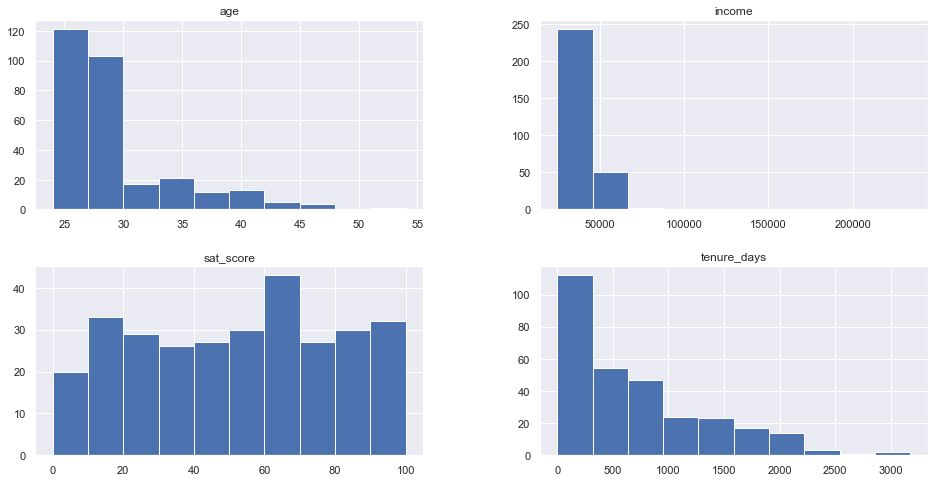

In [42]:
data[numeric_col].hist(figsize=(16, 8));

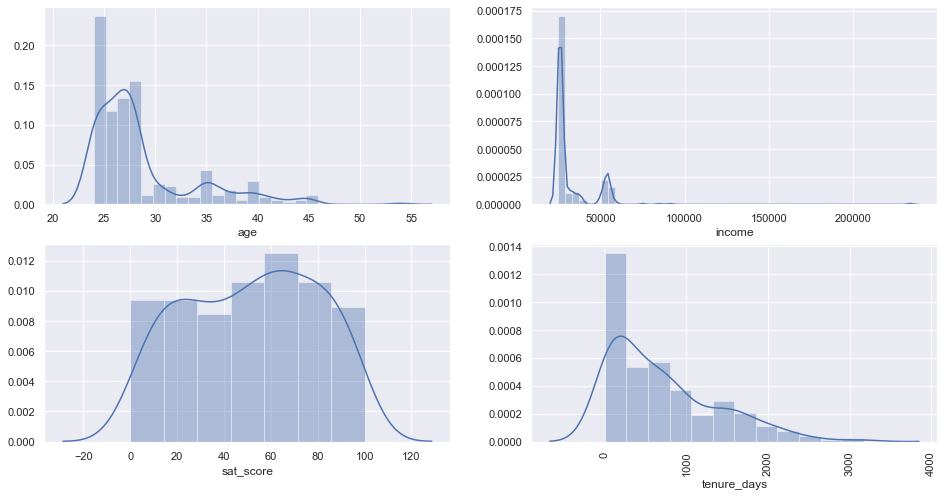

In [43]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
i = 0
j = 0
for col in numeric_col:
    _=sns.distplot(data[col], ax=axes[i][j]);
    _=plt.xticks(rotation=90)
    j+=1
    if j==2:
        i+=1
        j=0

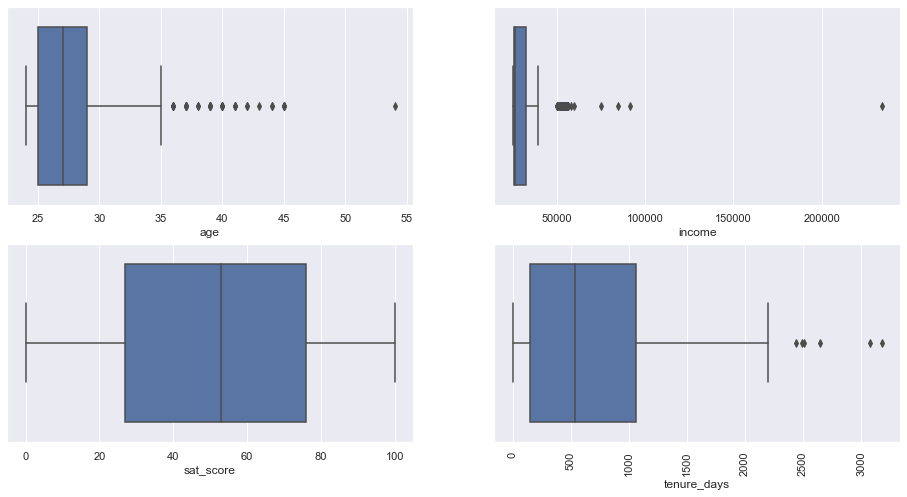

In [44]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
i = 0
j = 0
for col in numeric_col:
    _=sns.boxplot(data[col], ax=axes[i][j]);
    _=plt.xticks(rotation=90)
    j+=1
    if j==2:
        i+=1
        j=0

In [45]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
cat_cols

['grade',
 'gender',
 'education',
 'rating',
 'marital_status',
 'zone',
 'remarks',
 'corrected_location',
 'district',
 'state']

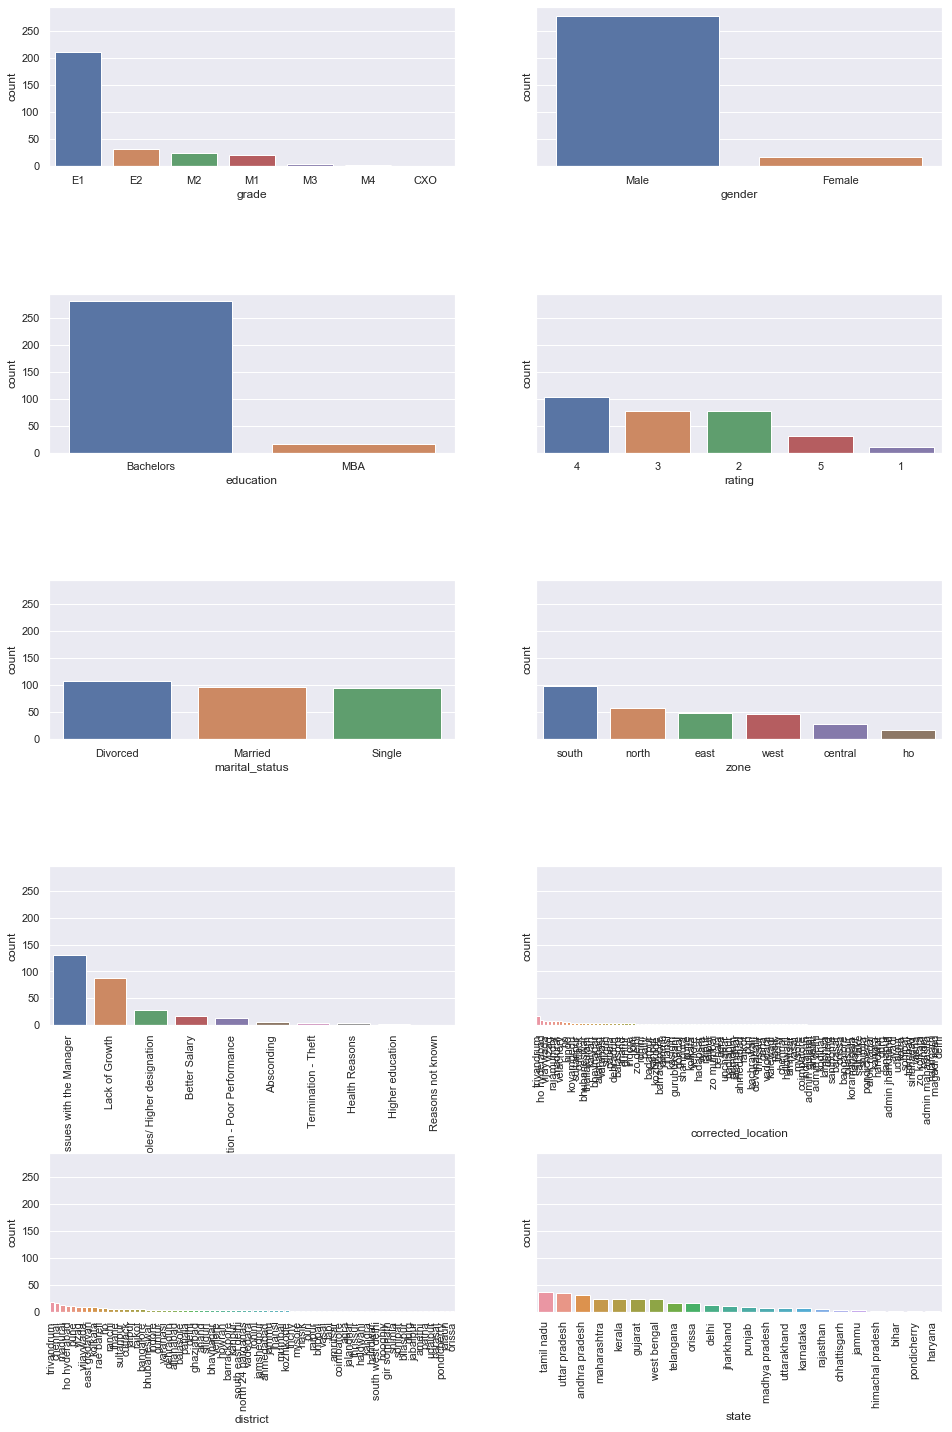

In [46]:
%matplotlib inline
_, axes = plt.subplots(nrows=5, ncols=2,sharey=True, figsize=(16, 24))
# plt.subplot_tool() ## Works for interactive
plt.subplots_adjust(hspace=0.8)
i = 0
j = 0
for col in cat_cols:
    if col == 'location': continue
    g=sns.countplot(x=col, data=data, ax=axes[i][j], order = list(data[col].value_counts().reset_index()['index']));
    if col in  ['remarks','corrected_location','district','state']:
        _=g.set_xticklabels(g.get_xticklabels(), rotation=90)
#     _ = plt.xticks(rotation=90)
    j+=1
    if j==2:
        i+=1
        j=0


### Multivariate visualization

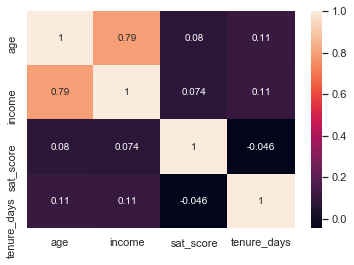

In [47]:
corr_matrix = data[numeric_col].corr()
sns.heatmap(corr_matrix, annot = True);

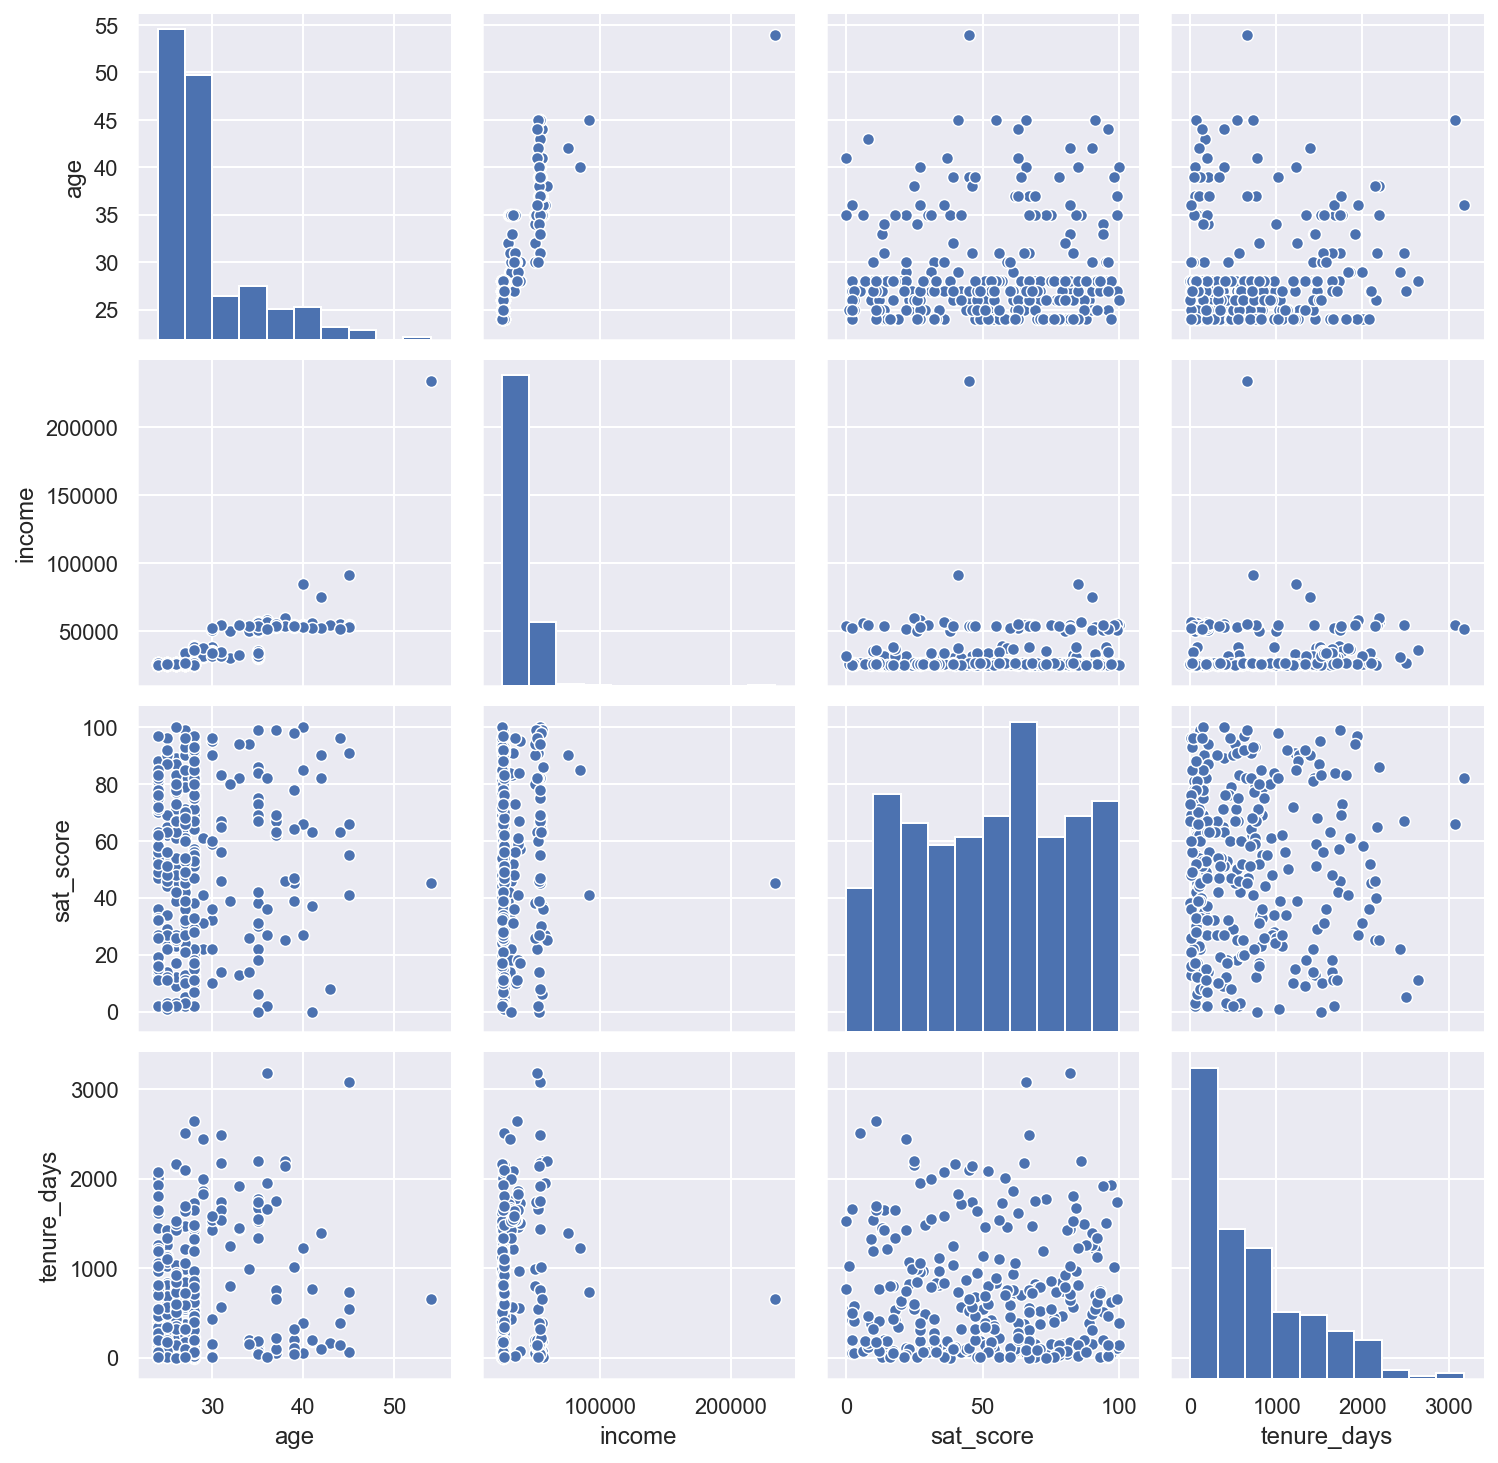

In [48]:
# `pairplot()` may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(data[numeric_col]);
%config InlineBackend.figure_format = 'retina'

In [49]:
numeric_col

['age', 'income', 'sat_score', 'tenure_days']

In [50]:
cat_cols

['grade',
 'gender',
 'education',
 'rating',
 'marital_status',
 'zone',
 'remarks',
 'corrected_location',
 'district',
 'state']

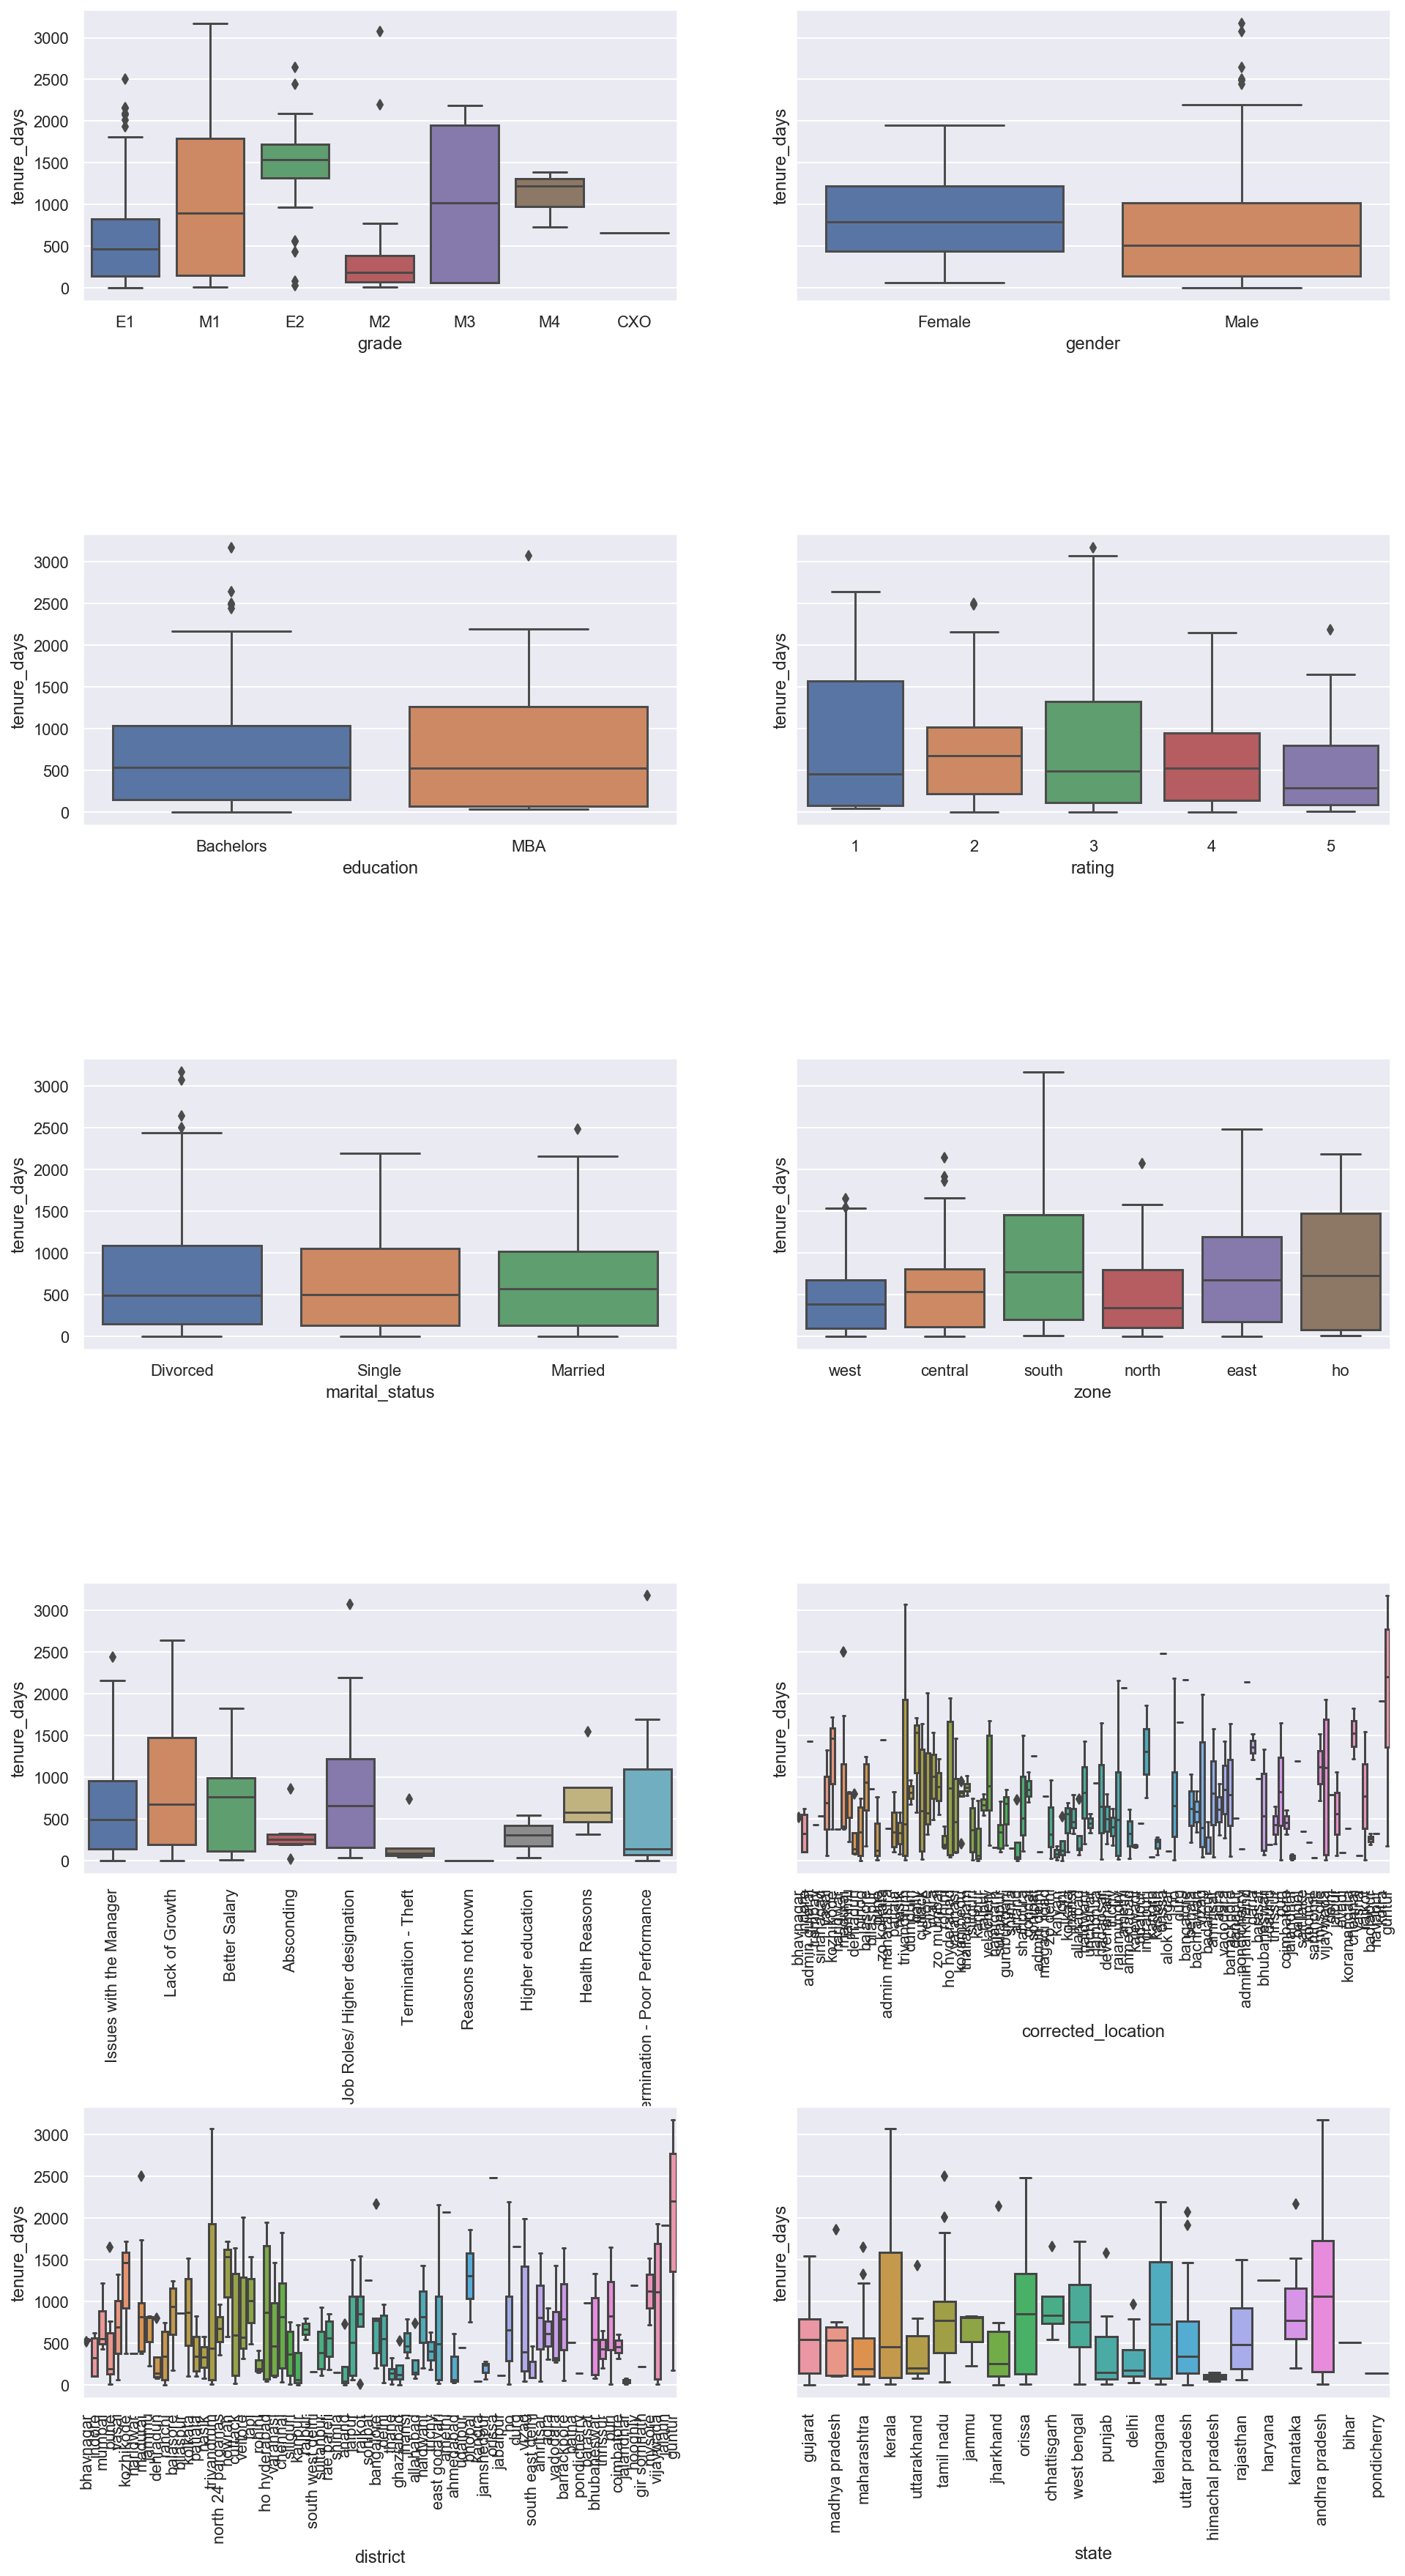

In [51]:
_, axes = plt.subplots(nrows=5, ncols=2,sharey=True, figsize=(16, 30))
plt.subplots_adjust(hspace=0.8)

i = 0
j = 0
for col in cat_cols:
    if col == 'location': continue
    g=sns.boxplot(x=col,y='tenure_days', data=data, ax=axes[i][j]);
    if col in  ['remarks','corrected_location','district','state']:
        _=g.set_xticklabels(g.get_xticklabels(), rotation=90)
#     _ = plt.xticks(rotation=90)
    j+=1
    if j==2:
        i+=1
        j=0


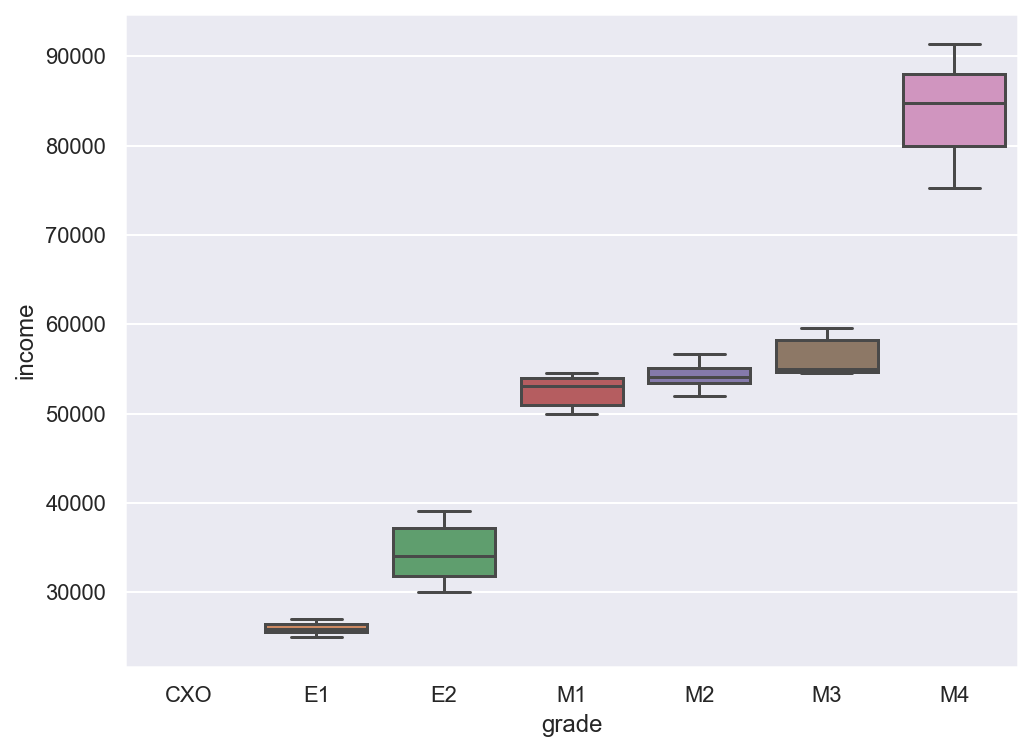

In [52]:
# _, axes = plt.subplots(2, 4, sharey=True, figsize=(12, 8))
plt.figure(figsize= (8,6))
sns.boxplot(x='grade', y='income', data=data[data['income']<1e5], order = sorted(data['grade'].unique()));

# CLUSTERING

In [53]:
%reset -f

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

In [55]:
data = pd.read_csv('data_complete_location.csv')
data.head()

,id,grade,tenure,gender,education,age,rating,income,sat_score,marital_status,zone,remarks,corrected_location,district,state,dol_date,doj_date,tenure_days
0,1,E1,1.60,Female,Bachelors,27,4,25535,2,Divorced,west,Issues with the Manager,bhavnagar,bhavnagar,gujarat,2012-05-26,2010-11-22,551
1,3,E1,1.50,Male,Bachelors,24,4,26438,18,Divorced,central,Issues with the Manager,indore,indore,madhya pradesh,2012-04-07,2010-10-20,535
2,4,M1,3.11,Male,Bachelors,33,2,54311,82,Single,west,Lack of Growth,admin gujarat,NaN,gujarat,2012-04-03,2008-05-01,1433
3,7,E1,1.20,Male,Bachelors,24,2,26663,2,Divorced,west,Lack of Growth,trombay,mumbai,maharashtra,2012-04-09,2011-02-07,427
4,8,E1,1.50,Male,Bachelors,27,3,25633,50,Married,west,Issues with the Manager,sinahagad,pune,maharashtra,2012-04-11,2010-10-20,539


In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Filter data
left_emp =  data[['sat_score', 'rating']]
# Create groups using K-means clustering.

ss= StandardScaler()
left_emp_scaled = ss.fit_transform(left_emp)
left_emp_scaled.shape
kmeans = KMeans(n_clusters = 4, random_state = 10).fit(left_emp_scaled)

C:\Users\Rahul Kumawat\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


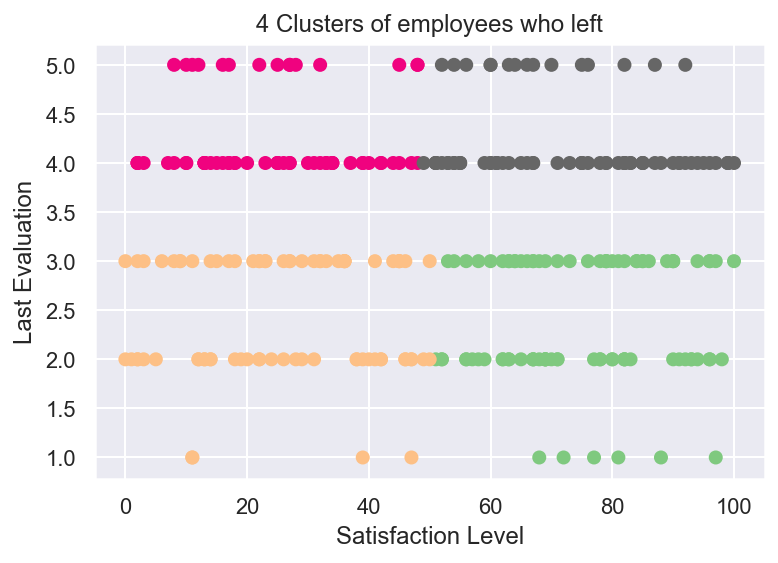

In [57]:
left_emp['label'] = kmeans.labels_
# Draw scatter plot
_ = plt.scatter(left_emp['sat_score'], left_emp['rating'], c=left_emp['label'],cmap='Accent')
_ = plt.xlabel('Satisfaction Level')
_ = plt.ylabel('Last Evaluation')
_ = plt.title('4 Clusters of employees who left')
plt.show()

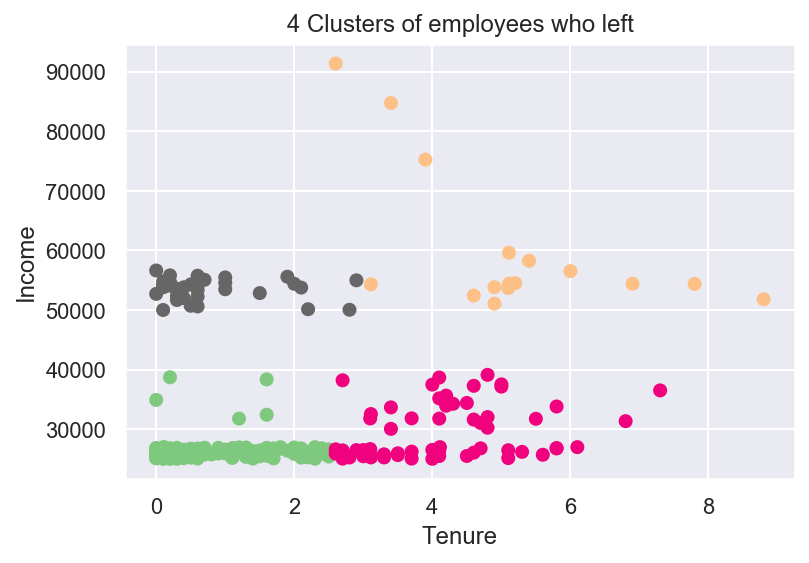

In [58]:
left_emp =  data[['tenure', 'income']]
left_emp = left_emp[left_emp['income']<1e5]
# Create groups using K-means clustering.

ss= StandardScaler()
left_emp_scaled = ss.fit_transform(left_emp)
left_emp_scaled.shape
kmeans = KMeans(n_clusters =4 , random_state = 10).fit(left_emp_scaled)

left_emp['label'] = kmeans.labels_
# Draw scatter plot
_ = plt.scatter(left_emp['tenure'], left_emp['income'], c=left_emp['label'],cmap='Accent')
_ = plt.xlabel('Tenure')
_ = plt.ylabel('Income')
_ = plt.title('4 Clusters of employees who left')
plt.show()

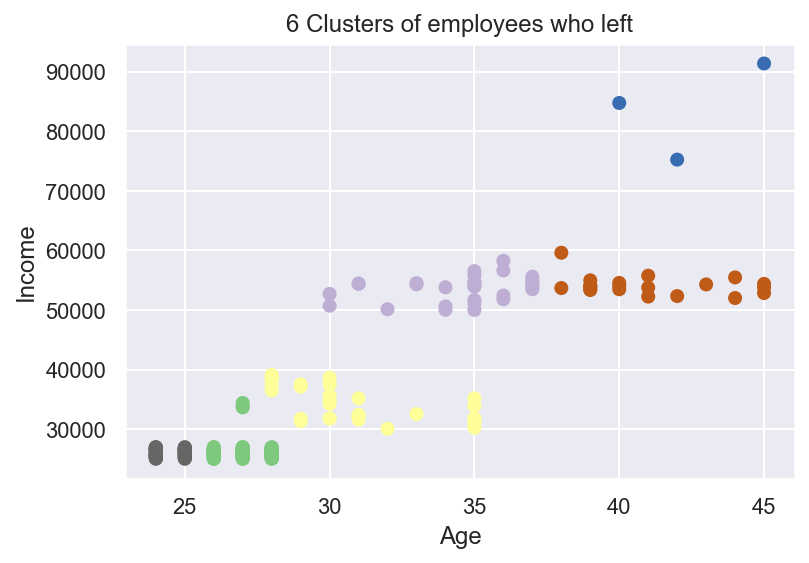

In [59]:
left_emp =  data[['age', 'income']]
left_emp = left_emp[left_emp['income']<1e5]
# Create groups using K-means clustering.

ss= StandardScaler()
left_emp_scaled = ss.fit_transform(left_emp)
left_emp_scaled.shape
kmeans = KMeans(n_clusters =6 , random_state = 10).fit(left_emp_scaled)

left_emp['label'] = kmeans.labels_
# Draw scatter plot
_=plt.scatter(left_emp['age'], left_emp['income'], c=left_emp['label'],cmap='Accent')
_=plt.xlabel('Age')
_=plt.ylabel('Income')
_=plt.title('6 Clusters of employees who left')
plt.show()

# FREQUENT PATTERN MINING

In [60]:
%reset -f

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

In [62]:
data = pd.read_csv('data_complete_location.csv')
data.head()

,id,grade,tenure,gender,education,age,rating,income,sat_score,marital_status,zone,remarks,corrected_location,district,state,dol_date,doj_date,tenure_days
0,1,E1,1.60,Female,Bachelors,27,4,25535,2,Divorced,west,Issues with the Manager,bhavnagar,bhavnagar,gujarat,2012-05-26,2010-11-22,551
1,3,E1,1.50,Male,Bachelors,24,4,26438,18,Divorced,central,Issues with the Manager,indore,indore,madhya pradesh,2012-04-07,2010-10-20,535
2,4,M1,3.11,Male,Bachelors,33,2,54311,82,Single,west,Lack of Growth,admin gujarat,NaN,gujarat,2012-04-03,2008-05-01,1433
3,7,E1,1.20,Male,Bachelors,24,2,26663,2,Divorced,west,Lack of Growth,trombay,mumbai,maharashtra,2012-04-09,2011-02-07,427
4,8,E1,1.50,Male,Bachelors,27,3,25633,50,Married,west,Issues with the Manager,sinahagad,pune,maharashtra,2012-04-11,2010-10-20,539


In [63]:
grade_int = {'E1':1,'E2':2,'M1':3,'M2':4,'M3':5,'M4':6,'CXO':7}
data['grade_int'] = data['grade'].apply(lambda x: grade_int[x])

In [64]:
not_required =  ['grade','dol_date','doj_date','id','corrected_location','district']

In [65]:
selected_cats = [ col for col in data.columns if data[col].dtype=='object' and col not in not_required]
selected_cats

['gender', 'education', 'marital_status', 'zone', 'remarks', 'state']

In [66]:
selected_nums = [col for col in data.columns if col not in selected_cats+not_required]

In [67]:
selected_nums

['tenure', 'age', 'rating', 'income', 'sat_score', 'tenure_days', 'grade_int']

## Frequent Item Sets

Some points to be noted:

1. Income is dependent on the grade of the employee.
2. Age and income are positively correlated
3. Due to the above two points, only grade is considered for the frequent item sets calculation
4. Tenure and sat_score are binned so as to be used for frequent itemset calculation purpose.

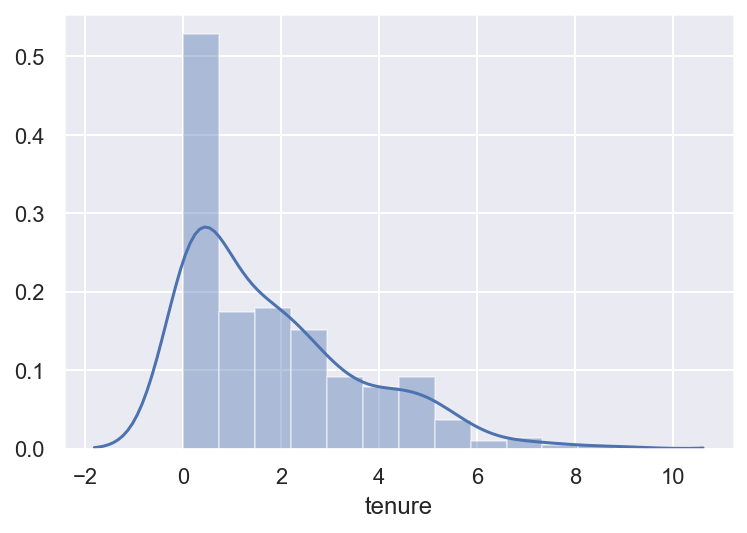

In [68]:
sns.distplot(data['tenure'])

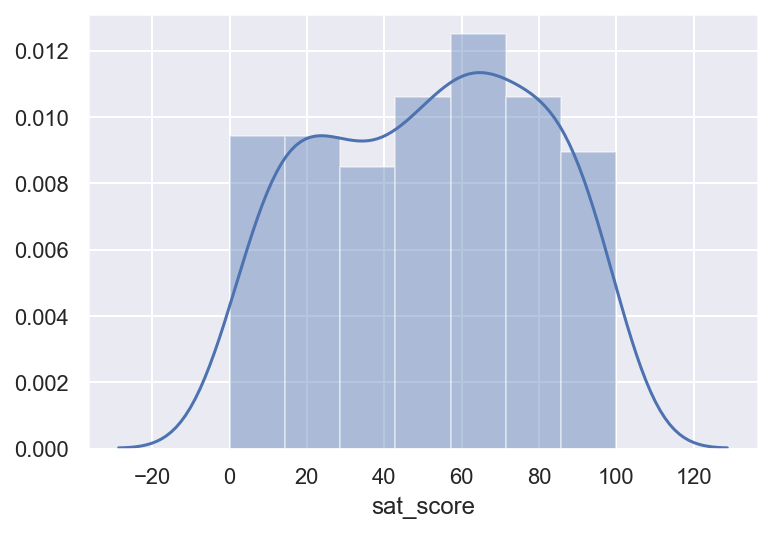

In [69]:
sns.distplot(data['sat_score'])

In [70]:
def sat_binner(x):
    return x//20 + 1 if not x%20 == 0 else x//20
data['sat_binned'] = data['sat_score'].apply(sat_binner).astype('object')

In [71]:
def tenure_binner(x):
    return x//2 + 1 if not x%2 == 0 else x//2
data['tenure_binned'] = data['tenure'].apply(tenure_binner).astype('object')

In [72]:
cols_for_frequent_items = ['grade','gender','education','rating','marital_status','zone','remarks','tenure_binned','sat_binned']

In [73]:
data_fp = data[cols_for_frequent_items]
# data_fp.head()

In [74]:
data_fp_enc = pd.get_dummies(data_fp, columns = data_fp.columns)
data_fp_enc.head()

,grade_CXO,grade_E1,grade_E2,grade_M1,grade_M2,grade_M3,grade_M4,gender_Female,gender_Male,education_Bachelors,...,tenure_binned_2.0,tenure_binned_3.0,tenure_binned_4.0,tenure_binned_5.0,sat_binned_0,sat_binned_1,sat_binned_2,sat_binned_3,sat_binned_4,sat_binned_5
0,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [75]:
pd.set_option('max_colwidth', 100)
# pd.set_option('max_rows',200)

In [76]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Rahul' is not recognized as an internal or external command,
operable program or batch file.


In [77]:
from mlxtend.frequent_patterns import apriori

freq_pattern = apriori(data_fp_enc, min_support=0.20, use_colnames=True)
freq_pattern['length'] = freq_pattern['itemsets'].apply(lambda x: len(x) )
freq_pattern[freq_pattern['length']>=4].sort_values('support',ascending= False)

,support,itemsets,length
87,0.407407,"(gender_Male, education_Bachelors, grade_E1, tenure_binned_1.0)",4
86,0.356902,"(education_Bachelors, gender_Male, remarks_Issues with the Manager, grade_E1)",4
83,0.245791,"(gender_Male, education_Bachelors, grade_E1, marital_status_Divorced)",4
89,0.239057,"(education_Bachelors, remarks_Issues with the Manager, grade_E1, tenure_binned_1.0)",4
90,0.239057,"(gender_Male, education_Bachelors, remarks_Issues with the Manager, tenure_binned_1.0)",4
84,0.228956,"(marital_status_Married, gender_Male, education_Bachelors, grade_E1)",4
88,0.225589,"(gender_Male, remarks_Issues with the Manager, grade_E1, tenure_binned_1.0)",4
91,0.225589,"(tenure_binned_1.0, gender_Male, education_Bachelors, grade_E1, remarks_Issues with the Manager)",5
82,0.222222,"(rating_4, gender_Male, education_Bachelors, grade_E1)",4
85,0.215488,"(gender_Male, education_Bachelors, grade_E1, zone_south)",4


In [78]:
fp2 = data[(data['gender']== 'Male') & (data['grade']=='E1') & (data['education'] =='Bachelors') & (data['tenure']<=2) ]
fp2.groupby('remarks').size().sort_values(ascending = False)
# fp2.groupby('zone').size().sort_values(ascending = False)
# fp2.groupby('rating').size().sort_values(ascending = False)
# fp2.groupby('sat_binned').size().sort_values(ascending = False)
# fp2.groupby('marital_status').size().sort_values(ascending = False)

remarks
Issues with the Manager                           75
Lack of Growth                                    35
Termination - Poor Performance                     6
Better Salary                                      6
Absconding                                         5
Termination - Theft                                4
Higher education                                   3
Health Reasons                                     2
Reasons not known                                  1
More Challenging Job Roles/ Higher designation     1
dtype: int64

In [79]:
# Interesting FP 
fp1 = data[(data['gender']== 'Male') & (data['grade']=='E1') & (data['education'] =='Bachelors') & (data['remarks']=='Issues with the Manager') ]

# Not so interesting other features
# fp1.groupby('marital_status').size().sort_values(ascending = False)
# fp1.groupby('zone').size().sort_values(ascending = False)
# fp1.groupby('rating').size().sort_values(ascending = False)
# fp1.groupby('sat_binned').size().sort_values(ascending = False)
# fp1.groupby('tenure_binned').size().sort_values(ascending = False)


In [80]:
#Not very interesting
# fp3 = data[(data['gender']== 'Male') & (data['grade']=='E1') & (data['education'] =='Bachelors') & (data['remarks']=='Issues with the Manager') &  (data['tenure']<=2)]
# fp3.groupby('zone').size().sort_values(ascending = False)
# fp3.groupby('rating').size().sort_values(ascending = False)
# fp3.groupby('sat_binned').size().sort_values(ascending = False)
# fp3.groupby('marital_status').size().sort_values(ascending = False)

# TENURE PREDICTION

In [81]:
%reset -f

In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [83]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [84]:
from math import sqrt
np.random.seed(42)

In [85]:
data = pd.read_csv('data_complete_location.csv')
data.head()

,id,grade,tenure,gender,education,age,rating,income,sat_score,marital_status,zone,remarks,corrected_location,district,state,dol_date,doj_date,tenure_days
0,1,E1,1.60,Female,Bachelors,27,4,25535,2,Divorced,west,Issues with the Manager,bhavnagar,bhavnagar,gujarat,2012-05-26,2010-11-22,551
1,3,E1,1.50,Male,Bachelors,24,4,26438,18,Divorced,central,Issues with the Manager,indore,indore,madhya pradesh,2012-04-07,2010-10-20,535
2,4,M1,3.11,Male,Bachelors,33,2,54311,82,Single,west,Lack of Growth,admin gujarat,NaN,gujarat,2012-04-03,2008-05-01,1433
3,7,E1,1.20,Male,Bachelors,24,2,26663,2,Divorced,west,Lack of Growth,trombay,mumbai,maharashtra,2012-04-09,2011-02-07,427
4,8,E1,1.50,Male,Bachelors,27,3,25633,50,Married,west,Issues with the Manager,sinahagad,pune,maharashtra,2012-04-11,2010-10-20,539


In [86]:
# data_used = data.drop(['corrected_location','district','state','doj_date','dol_date','tenure_days'], axis =1)
data_pred = data[['id','grade','tenure','gender','education','age','rating','income','sat_score','marital_status',\
                 'zone','remarks']]
# data_pred.info()

In [87]:
X = data_pred.drop(['id','tenure'], axis =1)
y = data_pred['tenure']

In [88]:
selected_cats = [col for col in X.columns if X[col].dtype == 'object']
selected_nums = [col for col in X.columns if col  not in selected_cats]

In [89]:
X = pd.get_dummies(X, columns = selected_cats)

In [90]:
train_samples = int(0.9*data_pred.shape[0])
train_indices = list(range(train_samples))
val_indices = list(range(train_samples, data_pred.shape[0]))
train_X = X.loc[train_indices, : ]
train_y = y.loc[train_indices]
val_X = X.loc[val_indices, : ]
val_y = y.loc[val_indices]

train_X.shape
train_y.shape
val_X.shape
val_y.shape

(30,)

In [91]:
ss= StandardScaler()
train_X_scaled = pd.DataFrame(ss.fit_transform(train_X), columns = train_X.columns)
train_y_logged = np.log1p(train_y)
val_X_scaled = pd.DataFrame(ss.transform(val_X), columns = val_X.columns)
# val_y = np.log1p(val_y)

In [92]:
def fit_model(model):
    if model == DecisionTreeRegressor:
        reg = model(random_state = 291)
    else:
        reg = model()
    reg.fit(train_X_scaled, train_y_logged)
    val_y_hat = np.expm1(reg.predict(val_X_scaled))
    print(f'MAE: {mean_absolute_error(val_y_hat, val_y)}')
    print(f'RMSE: {sqrt(mean_squared_error(val_y_hat, val_y))}')
#     return sqrt(mean_squared_error(val_y_hat, val_y))
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    
    ax[0].plot(list(range(len(val_y))), val_y_hat, label= 'Predicted Tenure (in yrs)')
    ax[0].plot(list(range(len(val_y))), val_y, label = 'Original  Tenure (in yrs)')
    ax[0].legend(loc = 'best')
    ax[0].set_title('Predictions')
    
    print(f'Using model : {model}')
    if model in [Lasso, Ridge, LinearRegression]:
        coeff_df = pd.DataFrame(reg.coef_, train_X_scaled.columns, columns=['Coefficient'])  

    elif model in [XGBRegressor,DecisionTreeRegressor]:
        coeff_df = pd.DataFrame(reg.feature_importances_, train_X_scaled.columns, columns=['Coefficient'])  
        
    else:
        print("No feature importance graph for DummyRegressor")
        return 
    
    coeff_df["abs"] = coeff_df.Coefficient.apply(np.abs)
    coeff_df = coeff_df.sort_values(by="abs", ascending=False).drop("abs", axis=1)
    
    ax[1].bar(coeff_df.index[:15],coeff_df['Coefficient'][:15])
    _ = plt.xticks(rotation=90)
    ax[1].set_title('Feature importance')


MAE: 2.1371027655661226
RMSE: 2.6490267051933754
Using model : <class 'sklearn.dummy.DummyRegressor'>
No feature importance graph for DummyRegressor


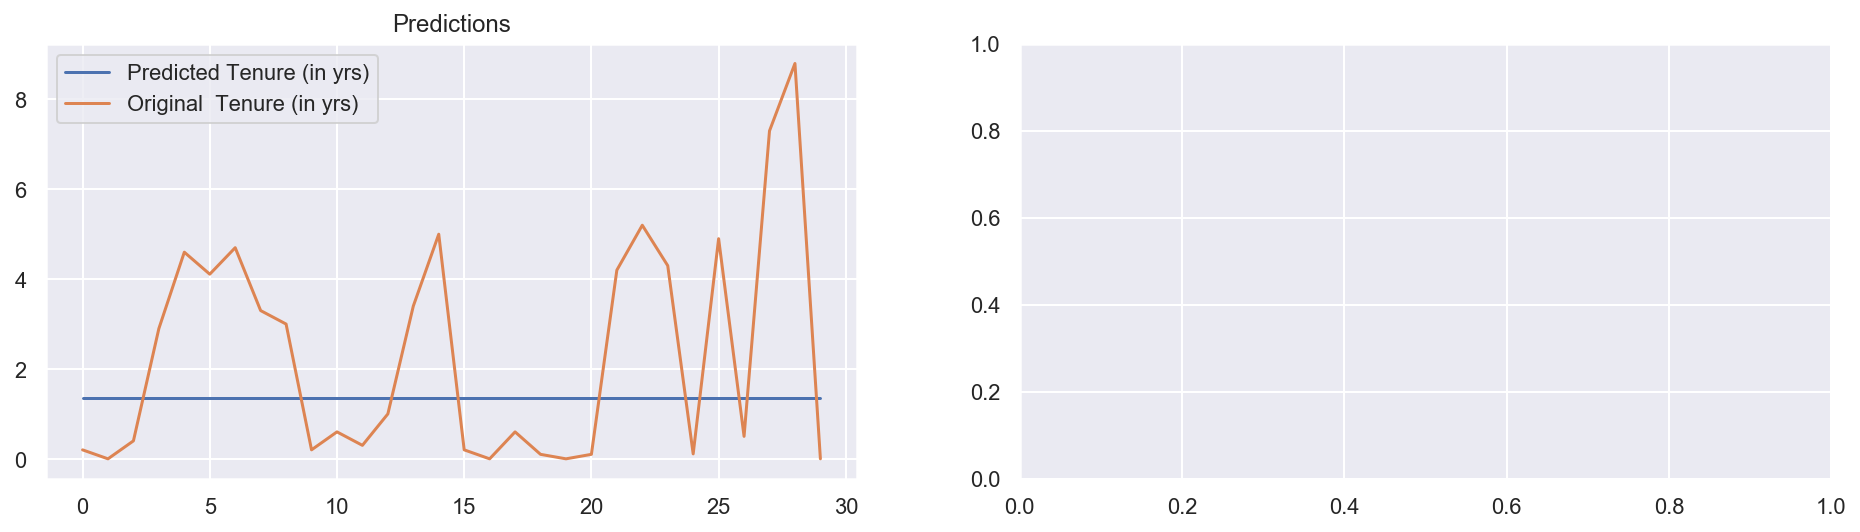

In [93]:
fit_model(DummyRegressor)

MAE: 1.6038980086137065
RMSE: 2.1115571173116825
Using model : <class 'sklearn.linear_model._base.LinearRegression'>


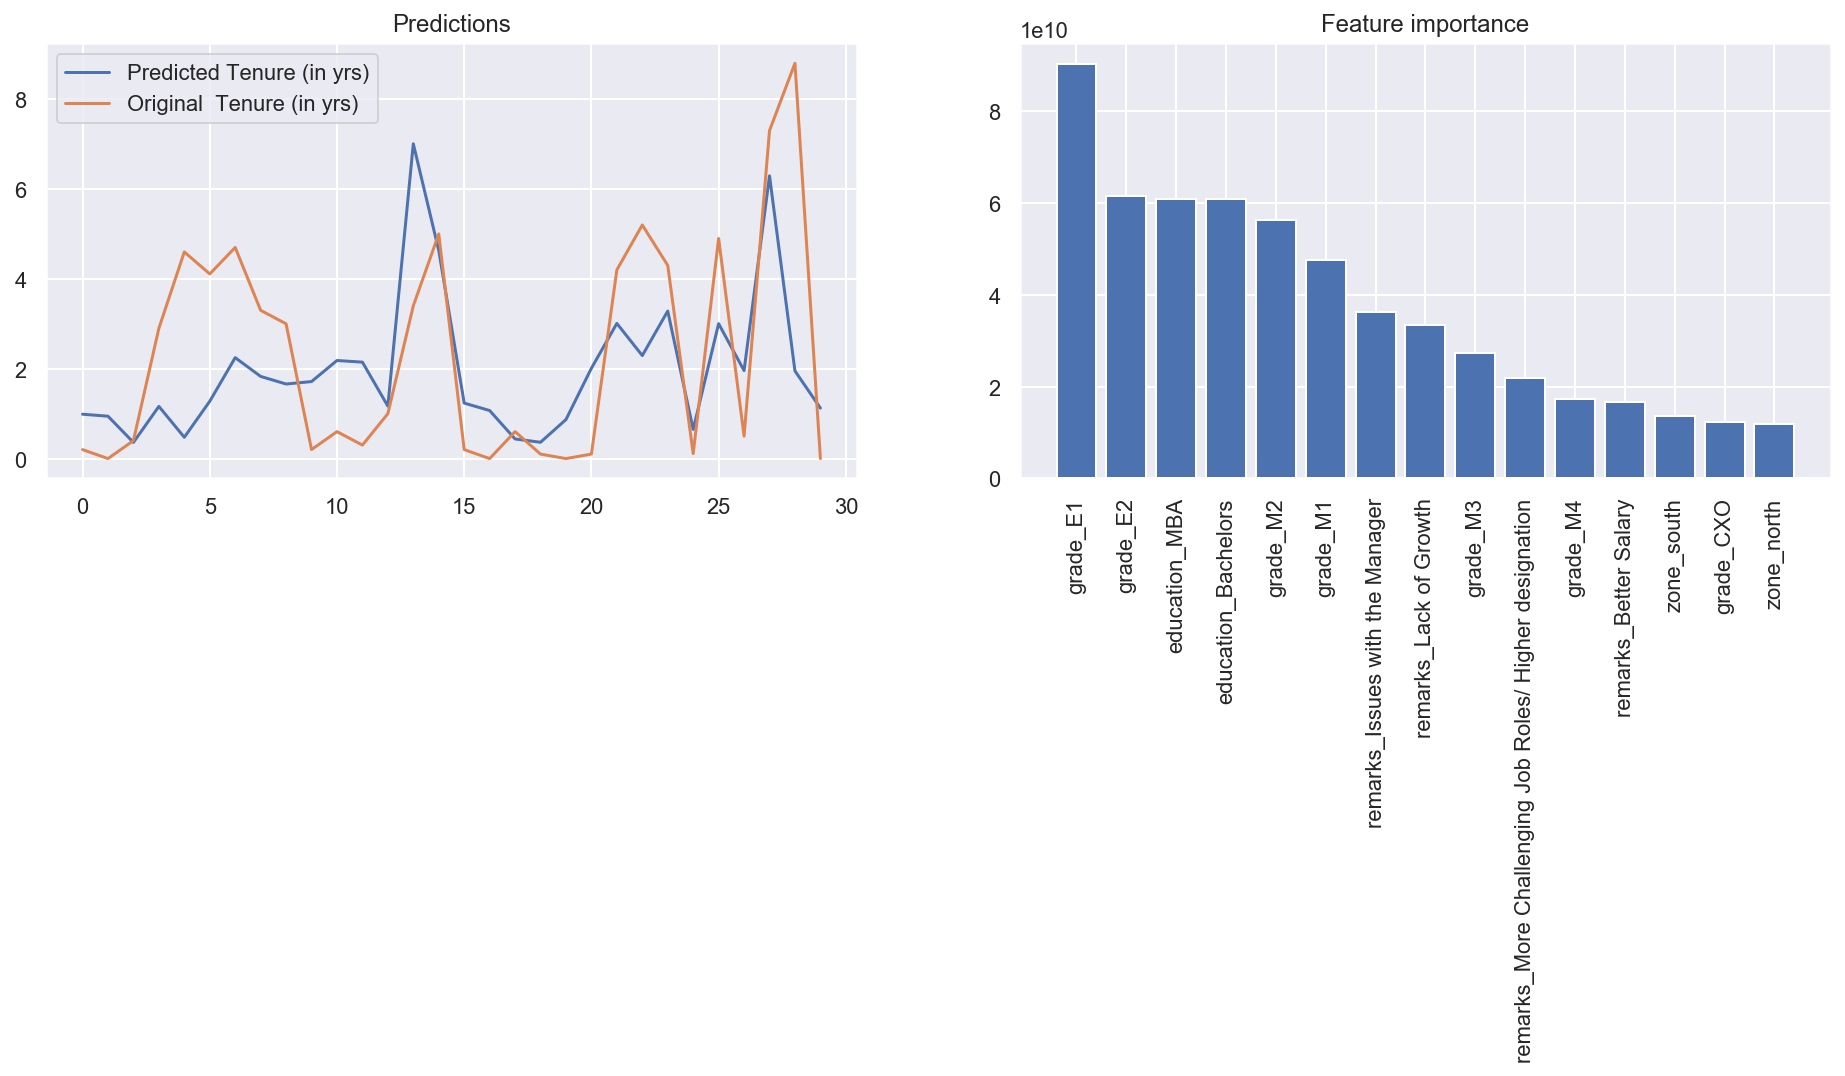

In [94]:
fit_model(LinearRegression)

MAE: 1.2306666666666668
RMSE: 1.779329461716782
Using model : <class 'sklearn.tree._classes.DecisionTreeRegressor'>


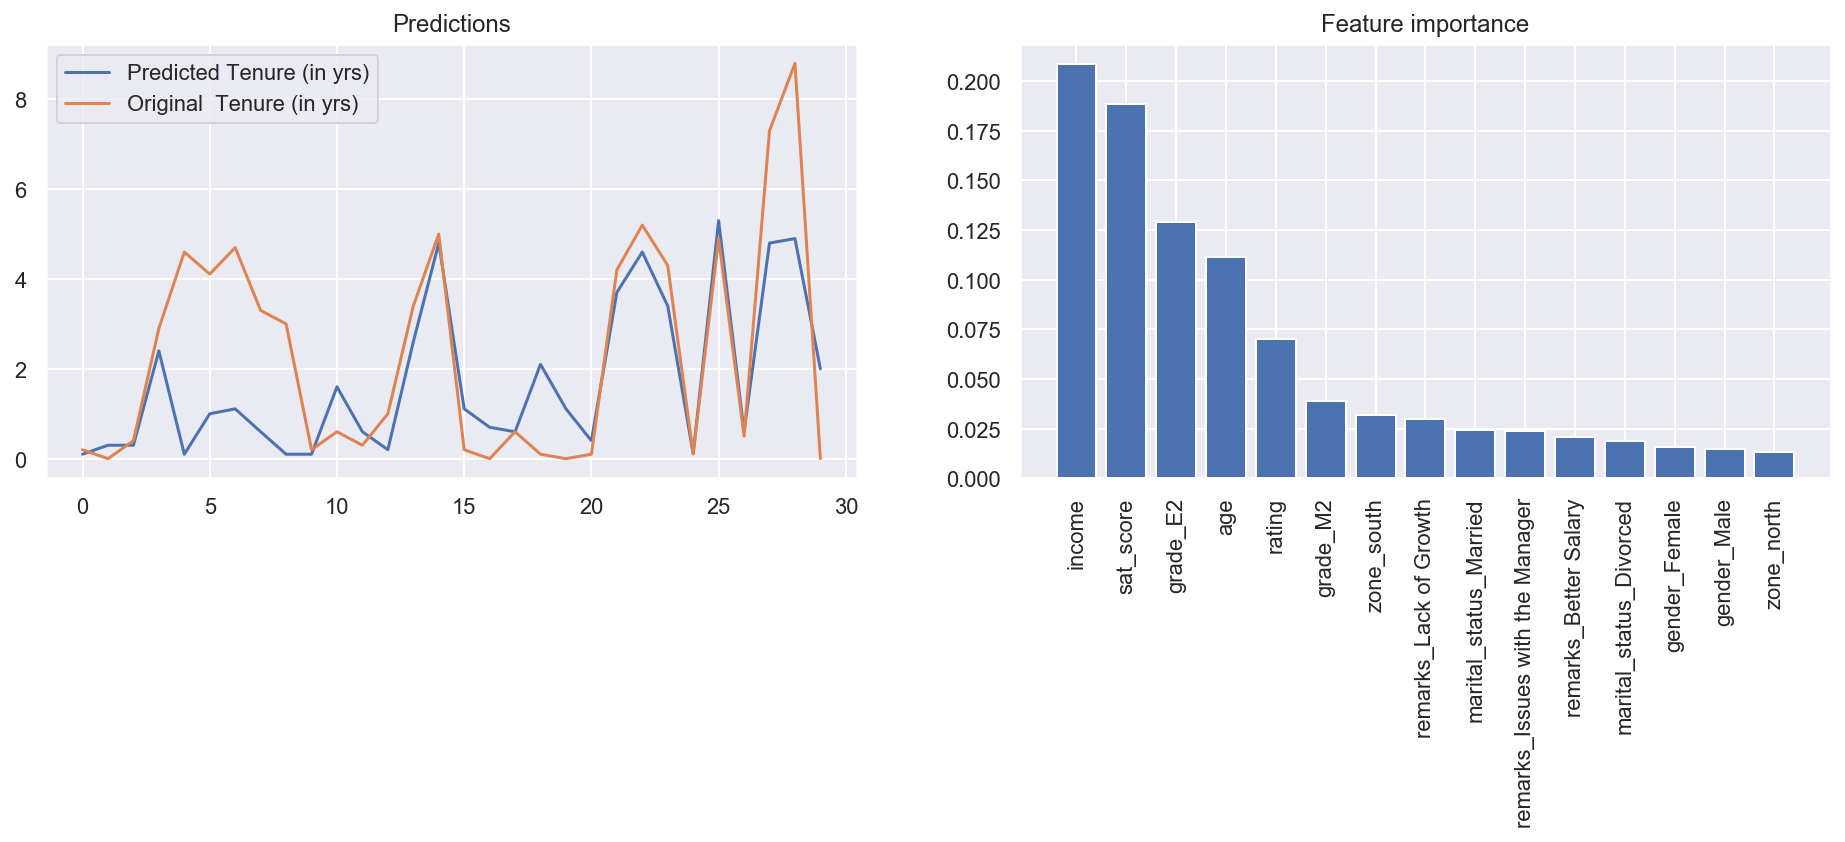

In [95]:
fit_model(DecisionTreeRegressor)

In [96]:
## To visualize the Decision Tree - But the tree is too big

# dt =DecisionTreeRegressor()
# dt.fit(train_X_scaled, train_y_logged)
# from sklearn.tree import export_graphviz
# export_graphviz(dt, out_file ='tree.dot', 
#                feature_names =train_X_scaled.columns)  

MAE: 1.6794163910547895
RMSE: 2.188899710543587
Using model : <class 'xgboost.sklearn.XGBRegressor'>


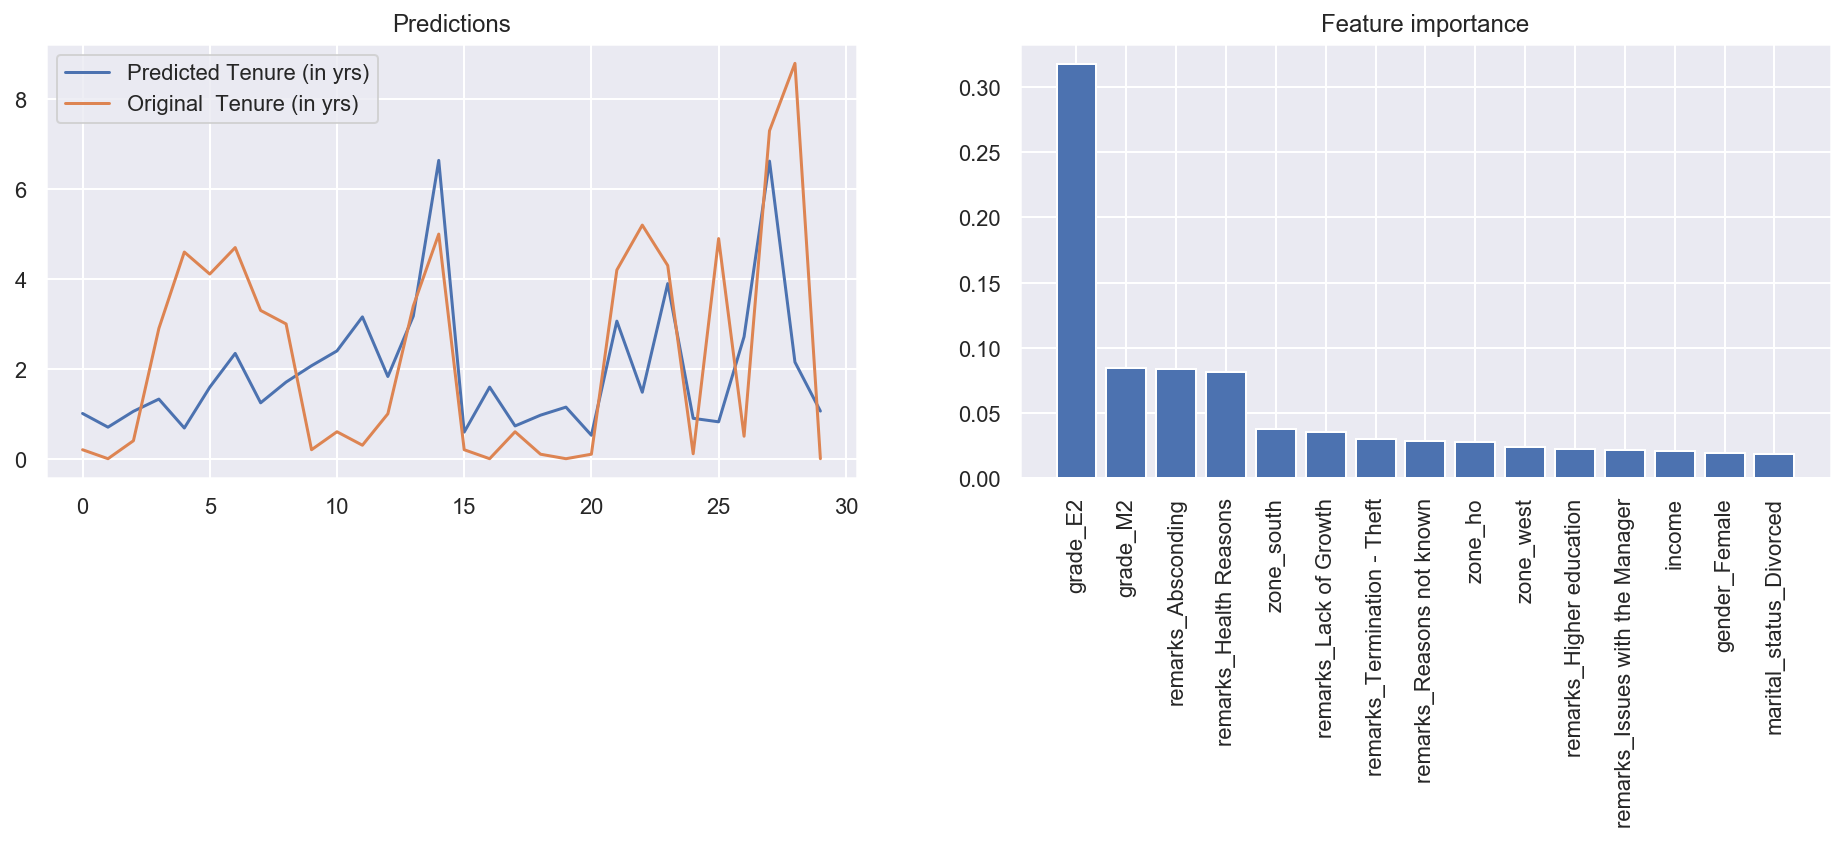

In [97]:
fit_model(XGBRegressor)

In [98]:
def plot_ensemble(model1, model2):
    if model1 == DecisionTreeRegressor:
        m1  = model1(random_state=291)
    else:
        m1 = model1()
    m1.fit(train_X_scaled, train_y_logged)
    m2 = model2()
    m2.fit(train_X_scaled, train_y_logged)
    val_y_hat = (np.expm1(m1.predict(val_X_scaled)) + np.expm1(m2.predict(val_X_scaled)))/2.0
    print(f'MAE: {mean_absolute_error(val_y_hat, val_y)}')
    print(f'RMSE: {sqrt(mean_squared_error(val_y_hat, val_y))}')
    
    fig, ax = plt.subplots(1,1)
    
    ax.plot(list(range(len(val_y))), val_y_hat, label= 'Predicted Tenure (in yrs)')
    ax.plot(list(range(len(val_y))), val_y, label = 'Original  Tenure (in yrs)')
    ax.legend(loc = 'best')
    ax.set_title('Predictions')

MAE: 1.6162899709100453
RMSE: 2.0887834180202933


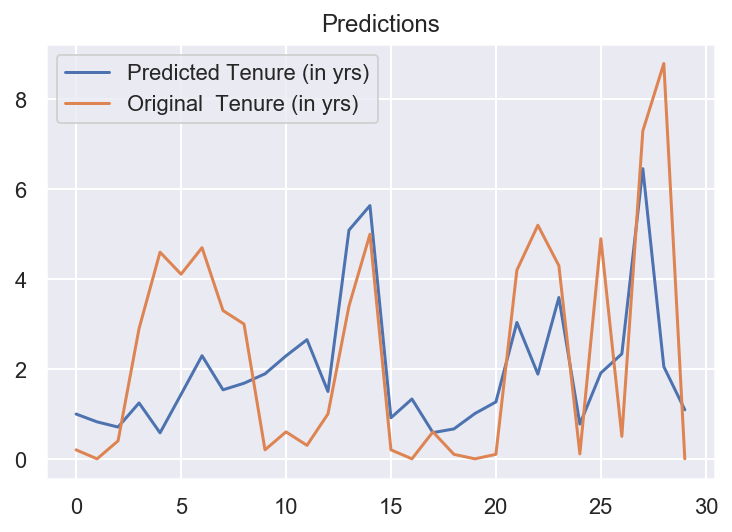

In [99]:
plot_ensemble(LinearRegression, XGBRegressor)

MAE: 1.3983748621940613
RMSE: 1.831210745434703


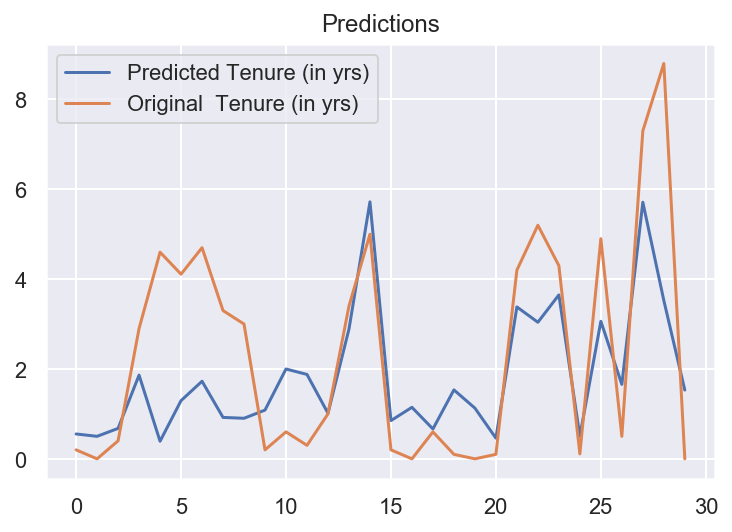

In [100]:
plot_ensemble(DecisionTreeRegressor, XGBRegressor)